In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objs as go

In [8]:
birdImage = cv2.imread('bird_small.png')

In [29]:
birdImage = cv2.cvtColor(birdImage, cv2.COLOR_BGR2RGB)
R, G, B = birdImage[:,:,0], birdImage[:,:,1], birdImage[:,:,2]
R = R.flatten()
G = G.flatten()
B = B.flatten()

In [30]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.set_title('RGB Scatter Plot')
# ax.set_xlabel('R')
# ax.set_ylabel('G')
# ax.set_zlabel('B')
# ax.scatter(R.flatten(), G.flatten(), B.flatten(), c=birdImage.reshape(-1, 3) / 255)

# plt.show()


# Assuming R, G, B are your color channels and birdImage contains the color information

# Create a trace for the scatter plot
trace = go.Scatter3d(
    x=R,  # Flatten the R channel
    y=G,  # Flatten the G channel
    z=B,  # Flatten the B channel
    mode='markers',
    marker=dict(
        size=5,
        color=birdImage.reshape(-1, 3) / 255,  # Setting the color of points
        opacity=0.8
    )
)

# Create the layout for the plot
layout = go.Layout(
    title='RGB Scatter Plot',
    scene=dict(
        xaxis=dict(title='R'),
        yaxis=dict(title='G'),
        zaxis=dict(title='B'),
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create the figure with the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()

c:\Users\tariq\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



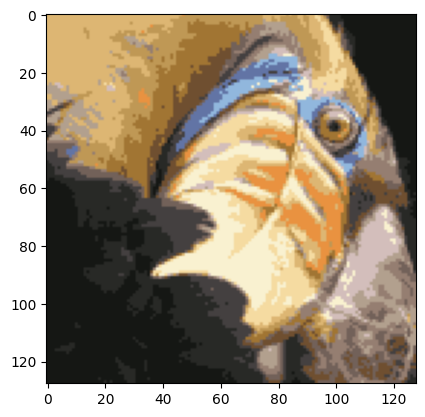

In [49]:
pixels = birdImage.reshape(-1, 3)
kmeans = KMeans(n_clusters=16, random_state=42).fit(pixels)
labels = kmeans.predict(pixels)
centroids = kmeans.cluster_centers_.astype(int)
segmented_img = centroids[labels].reshape(birdImage.shape)
plt.imshow(segmented_img)
plt.show()

In [61]:
centroids[labels]

array([[221, 182, 115],
       [221, 182, 115],
       [221, 182, 115],
       ...,
       [ 40,  41,  38],
       [ 40,  41,  38],
       [ 40,  41,  38]])